# MCMC Sampling

The  `CmdStanModel` class method  `sample` invokes Stan's adaptive HMC-NUTS
sampler which uses the Hamiltonian Monte Carlo (HMC) algorithm
and its adaptive variant the no-U-turn sampler (NUTS) to produce a set of
draws from the posterior distribution of the model parameters conditioned on the data.
It returns a `CmdStanMCMC` object
which provides properties to retrieve information about the sample, as well as methods
to run CmdStan's summary and diagnostics tools.

In order to evaluate the fit of the model to the data, it is necessary to run
several Monte Carlo chains and compare the set of draws returned by each.
By default, the `sample` command runs 4 sampler chains, i.e.,
CmdStanPy invokes CmdStan 4 times.
CmdStanPy uses Python's `subprocess` and `multiprocessing` libraries
to run these chains in separate processes.
This processing can be done in parallel, up to the number of
processor cores available.

## Fitting a model to data

In this example we use the CmdStan example model
[bernoulli.stan](https://github.com/stan-dev/cmdstanpy/blob/master/test/data/bernoulli.stan)
and data file
[bernoulli.data.json](https://github.com/stan-dev/cmdstanpy/blob/master/test/data/bernoulli.data.json>).

We instantiate a model and do sampling using the default CmdStan settings:

In [1]:
import os
from cmdstanpy.model import CmdStanModel
from cmdstanpy.utils import cmdstan_path
    
bernoulli_dir = os.path.join(cmdstan_path(), 'examples', 'bernoulli')
bernoulli_path = os.path.join(bernoulli_dir, 'bernoulli.stan')
bernoulli_data = os.path.join(bernoulli_dir, 'bernoulli.data.json')

# instantiate, compile bernoulli model
bernoulli_model = CmdStanModel(stan_file=bernoulli_path)

# run CmdStan's sample method, returns object `CmdStanMCMC`
bern_fit = bernoulli_model.sample(data=bernoulli_data)
bern_fit.summary()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /Users/mitzi/.cmdstanpy/cmdstan-2.24.0/examples/bernoulli/bernoulli
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-7.248630,0.017720,0.696304,-8.67105,-6.978280,-6.750120,1544.13,7388.18,0.999685
theta,0.248684,0.003088,0.117110,0.08323,0.235217,0.463638,1437.90,6879.89,1.002630


The ``bern_fit`` object records the command, the return code,
and the paths to the sampler output csv and console files.
The string representation of this object displays the CmdStan commands and
the location of the output files.

Output filenames are composed of the model name, a timestamp
in the form YYYYMMDDhhmm and the chain id, plus the corresponding
filetype suffix, either '.csv' for the CmdStan output or '.txt' for
the console messages, e.g. `bernoulli-201912081451-1.csv`. Output files
written to the temporary directory contain an additional 8-character
random string, e.g. `bernoulli-201912081451-1-5nm6as7u.csv`.

In [2]:
bern_fit

CmdStanMCMC: model=bernoulli chains=4['method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	/var/folders/sc/0f0wdc_11_xgjs2v52g20fvr0000gn/T/tmpkorblq_n/bernoulli-202008181851-1-w4q71ta0.csv
	/var/folders/sc/0f0wdc_11_xgjs2v52g20fvr0000gn/T/tmpkorblq_n/bernoulli-202008181851-2-9w584a45.csv
	/var/folders/sc/0f0wdc_11_xgjs2v52g20fvr0000gn/T/tmpkorblq_n/bernoulli-202008181851-3-ciwuk44m.csv
	/var/folders/sc/0f0wdc_11_xgjs2v52g20fvr0000gn/T/tmpkorblq_n/bernoulli-202008181851-4-3ko38ipr.csv
 output_files:
	/var/folders/sc/0f0wdc_11_xgjs2v52g20fvr0000gn/T/tmpkorblq_n/bernoulli-202008181851-1-w4q71ta0-stdout.txt
	/var/folders/sc/0f0wdc_11_xgjs2v52g20fvr0000gn/T/tmpkorblq_n/bernoulli-202008181851-2-9w584a45-stdout.txt
	/var/folders/sc/0f0wdc_11_xgjs2v52g20fvr0000gn/T/tmpkorblq_n/bernoulli-202008181851-3-ciwuk44m-stdout.txt
	/var/folders/sc/0f0wdc_11_xgjs2v52g20fvr0000gn/T/tmpkorblq_n/bernoulli-202008181851-4-3ko38ipr-stdout.txt

The sampler output files are written to a temporary directory which
is deleted upon session exit unless the ``output_dir`` argument is specified.
The ``save_csvfiles`` function moves the CmdStan csv output files
to a specified directory without having to re-run the sampler.

In [3]:
bern_fit.save_csvfiles(dir='.')
bern_fit

CmdStanMCMC: model=bernoulli chains=4['method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	./bernoulli-202008181851-1.csv
	./bernoulli-202008181851-2.csv
	./bernoulli-202008181851-3.csv
	./bernoulli-202008181851-4.csv
 output_files:
	/var/folders/sc/0f0wdc_11_xgjs2v52g20fvr0000gn/T/tmpkorblq_n/bernoulli-202008181851-1-w4q71ta0-stdout.txt
	/var/folders/sc/0f0wdc_11_xgjs2v52g20fvr0000gn/T/tmpkorblq_n/bernoulli-202008181851-2-9w584a45-stdout.txt
	/var/folders/sc/0f0wdc_11_xgjs2v52g20fvr0000gn/T/tmpkorblq_n/bernoulli-202008181851-3-ciwuk44m-stdout.txt
	/var/folders/sc/0f0wdc_11_xgjs2v52g20fvr0000gn/T/tmpkorblq_n/bernoulli-202008181851-4-3ko38ipr-stdout.txt

## Running the sampler with `fixed_param=True` to generate simulated data.

In this example we show how to generate a sample using a known value of some parameter $\theta$.  Being able to generate sample data is a key component of the Bayesian workflow; it allows us to demonstrate model correctness.
When fitting a model to simulated data, we expect the model to recover the true parameter value, however the estimate will have some amount of variation; this is the _sampling uncertainty_.  See the Stan User's Guide chapter on [posterior predictive sampling](https://mc-stan.org/docs/stan-users-guide/sampling-from-the-posterior-predictive-distribution.html) for futher discussion.

The sample is generated from running the MCMC sampler on a Stan program; because the value of the parameter is declared as data instead of estimated in the program's model block, which is empty, it is necessary to run the sampler with argument `fixed_param=True`.

In [4]:
datagen_model=CmdStanModel(stan_file='bernoulli_datagen.stan')
print(datagen_model.code())

INFO:cmdstanpy:compiling stan program, exe file: /Users/mitzi/github/stan-dev/cmdstanpy/docs/notebooks/bernoulli_datagen
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /Users/mitzi/github/stan-dev/cmdstanpy/docs/notebooks/bernoulli_datagen


data { 
  int<lower=0> N;
  real<lower=0,upper=1> theta;
} 
generated quantities {
  int theta_rep = 0;
  for (n in 1:N)
    theta_rep += bernoulli_rng(theta);
}



The program `bernoulli_datagen.stan` declares two variables in the `data` block:  `N`, the number of Bernoulli trials, and `theta`, the probability of success.  In the `generated quantities` block of the program we define variable `theta_rep` which accumulates the total successful outcomes for `N` trials with probability `theta`.

In [7]:
sim_data = datagen_model.sample(fixed_param=True, data={"N":10, "theta":0.73})
sim_data.summary()

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.000,NaN,0.00000,0,0,0,NaN,NaN,NaN
theta_rep,7.262,0.051233,1.46407,5,7,9,816.615,90735.0,1.0023


Because the number of successes is a discrete outcome, we plot these not as a histogram, but as a barchart:

Text(0.5, 1.0, 'Total successes for 10 trials with probability of success 0.73')

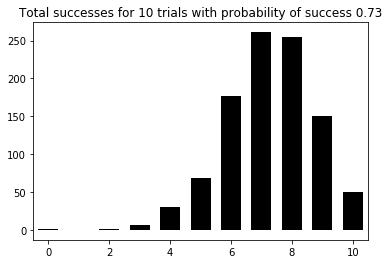

In [8]:
import matplotlib.pyplot as plt
import numpy as np

values, counts = np.unique(sim_data.stan_variable('theta_rep'), return_counts=True)
plt.vlines(values, 0, counts, lw=20)
plt.title('Total successes for 10 trials with probability of success 0.73')